In [1]:
import numpy as np
import pylab as plt
import pickle
import os,sys
import pandas as pd
from collections import Counter

%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
path_data = os.path.abspath(os.path.join(os.pardir,'results'))
print(path_data)

/DRIVE/REPOS/wos-text-dynamics/results


In [4]:
def moving_window(x_,s_):
    n_ = len(x_)
    x_new_ = []
    for i_ in range(n_-s_):
        x_new_ += [np.mean( x_[i_:i_+s_] )]
    return np.array(x_new_)

# results of some set of categories compiled by Jared

In [5]:
fname_data = 'cat_pubs_by_year.pkl'
with open(os.path.join(path_data,fname_data),'rb') as f:
    x=pickle.load(f,encoding='latin-1')

In [6]:
len(x)

25

In [7]:
list_cats = list(x.keys())
print(list_cats.index('ALL'))
ind_del = list_cats.index('ALL')
del list_cats[ind_del]

251


In [8]:
cat_ = list_cats[0]
print(cat_)

Acoustics


In [9]:
s = 5

In [10]:
cat_

'Acoustics'

20 [  976689.8  1022498.8  1070082.6  1109778.6  1144176.6  1169164.6
  1180986.6  1195896.8  1217608.6  1251438.   1297374.2  1358568.4
  1425182.4  1502123.2  1574111.8  1637249.4  1705287.6  1774472.2
  1844610.   1906692.8]


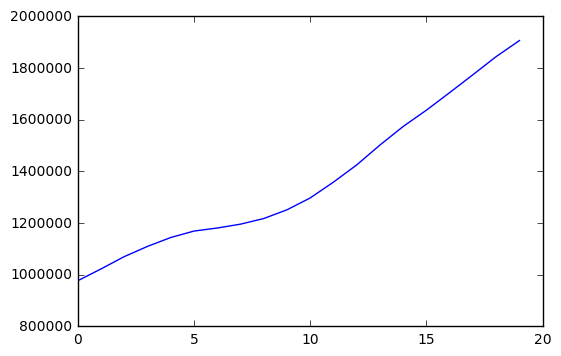

In [11]:
n_pubs_tot_ = moving_window(x['ALL'].values,s)
print(len(n_pubs_tot_),n_pubs_tot_)
plt.plot(n_pubs_tot_)

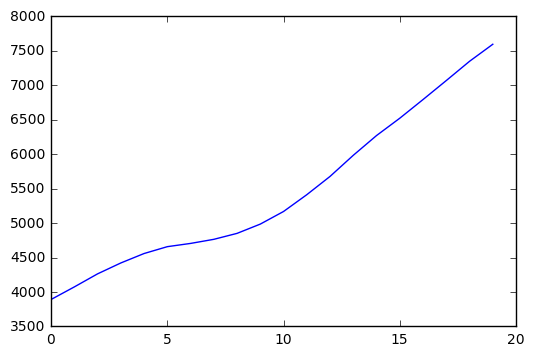

In [12]:
plt.plot(n_pubs_tot_/len(list_cats))

## Looking at the number of publications

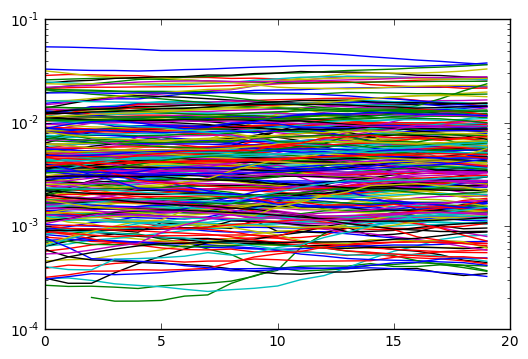

In [13]:
for cat_ in list_cats:
#     print(len(x[cat_]))
    p_pubs_= moving_window(x[cat_].values,s)/n_pubs_tot_
    plt.plot(p_pubs_)
plt.yscale('log')

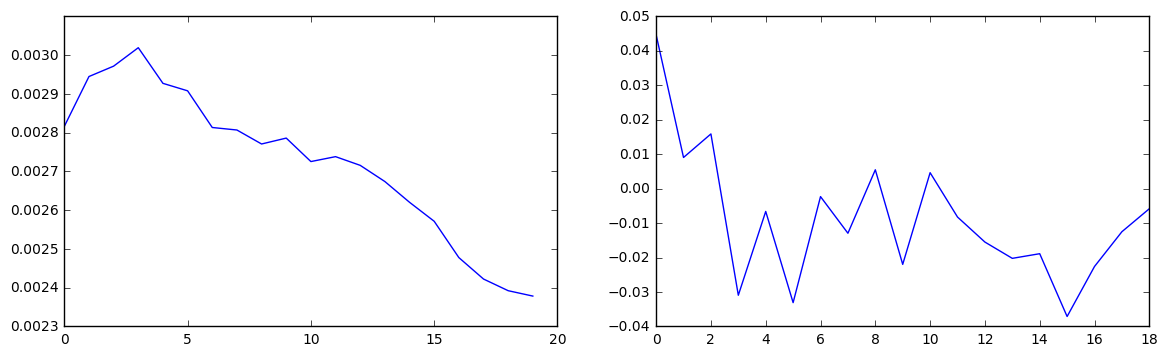

In [14]:
cat_ = list_cats[0]
p_pubs_ = moving_window(x[cat_].values,s)/n_pubs_tot_
growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(p_pubs_)
plt.subplot(122)
plt.plot(growth_rate_)

In [15]:
np.mean(growth_rate_)

-0.0088944469143870074

In [16]:
list_growth_rate_avg = []
for cat_ in list_cats:
    p_pubs_ = moving_window(x[cat_].values,s)/n_pubs_tot_
    growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
    mu_ = np.mean(growth_rate_)
    if np.isnan(mu_):
        mu_ = 0.0
    list_growth_rate_avg += [mu_]

(-0.1, 0.1)

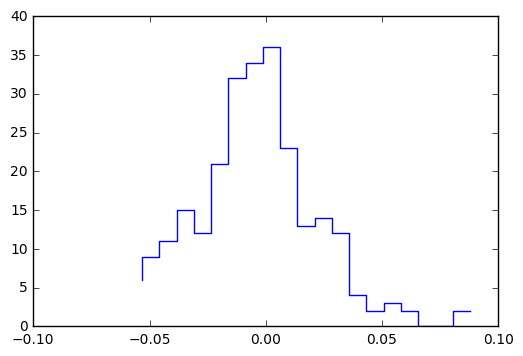

In [17]:
h,bins = np.histogram(list_growth_rate_avg,bins=20)
plt.step(bins[:-1],h)
plt.xlim(-0.1,0.1)

In [18]:
list_growth_rate_avg_indsort = np.argsort(list_growth_rate_avg)

In [19]:
n_sel = 5


### the fields that declined the most

Literature, German, Dutch, Scandinavian -0.0532293160827
Social Issues -0.0524673343516
Poetry -0.0510384956729
Engineering, Aerospace -0.0479931788383
Literary Reviews -0.0472961902008


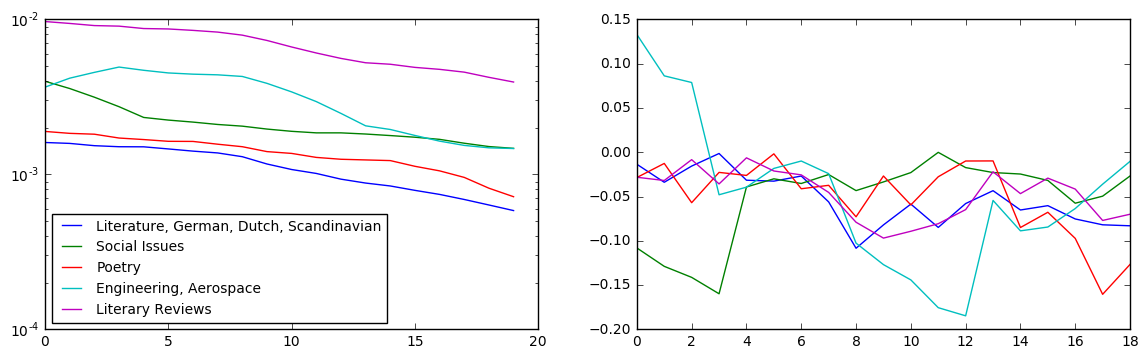

In [22]:
plt.figure(figsize=(14,4))

inds_min = list_growth_rate_avg_indsort[:n_sel]
for ind_ in inds_min:
    cat_ = list_cats[ind_]
    print(cat_,list_growth_rate_avg[ind_])
    p_pubs_ = moving_window(x[cat_].values,s)/n_pubs_tot_
    growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
    
    plt.subplot(121)
    plt.plot(p_pubs_,label = cat_)
    plt.subplot(122)
    plt.plot(growth_rate_)
plt.subplot(121)
plt.yscale('log')
plt.legend(loc='lower left',fontsize=10)
plt.subplot(122)


### the fields that increased the most

Nanoscience & Nanotechnology 0.0952342458401
Integrative & Complementary Medicine 0.089989087299
Transportation 0.0697618459856
Materials Science, Biomaterials 0.0674341642348
Hospitality, Leisure, Sport & Tourism 0.0634174658483


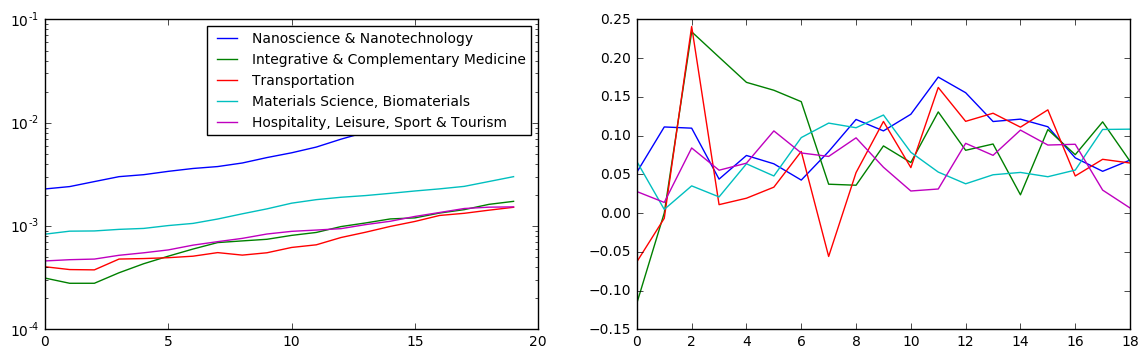

In [21]:
plt.figure(figsize=(14,4))

inds_max = list_growth_rate_avg_indsort[-n_sel:]
for ind_ in inds_max[::-1]:
    cat_ = list_cats[ind_]
    print(cat_,list_growth_rate_avg[ind_])
    p_pubs_ = moving_window(x[cat_].values,s)/n_pubs_tot_
    growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
    plt.subplot(121)
    plt.plot(p_pubs_,label = cat_)
    plt.subplot(122)
    plt.plot(growth_rate_)
plt.subplot(121)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=10)
plt.subplot(122)

In [ ]:
x['Literary']

## TODO: 
- growth/decline only for small/big fields?
